# This is for Classification Demo for Supervised ML

Adding imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math

Plotting a scattered graph

Text(0.5, 1.0, 'Scatter Plot')

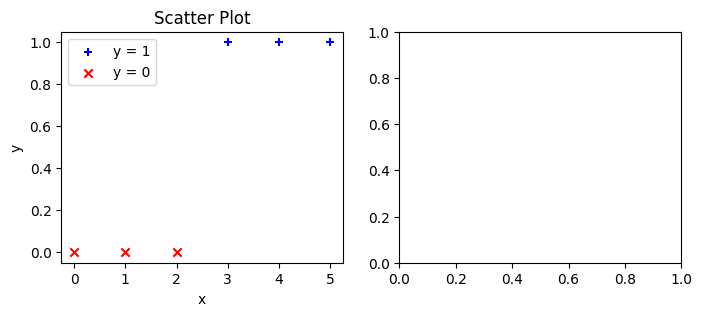

In [3]:
x_train = np.array([0.,1,2,3,4,5])
y_train = np.array([0,0,0,1,1,1])

pos = y_train == 1
neg = y_train == 0




_, ax = plt.subplots(1,2,figsize=(8,3))


ax[0].scatter(x_train[pos], y_train[pos], marker = "+", c = "b", label = "y = 1")
ax[0].scatter(x_train[neg], y_train[neg], marker = "x", c = "r", label = "y = 0")

ax[0].legend()
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Scatter Plot")




Computing Z (sigmoid of a value)

In [4]:
def sigmoid(z):
  return 1/ (1+ np.exp(-z))

calculating and plotting graphs for input ,a sample linear regression and  sigmoid function

[-25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8
  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10
  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25]
[1.38879439e-11 3.77513454e-11 1.02618796e-10 2.78946809e-10
 7.58256042e-10 2.06115362e-09 5.60279641e-09 1.52299795e-08
 4.13993755e-08 1.12535162e-07 3.05902227e-07 8.31528028e-07
 2.26032430e-06 6.14417460e-06 1.67014218e-05 4.53978687e-05
 1.23394576e-04 3.35350130e-04 9.11051194e-04 2.47262316e-03
 6.69285092e-03 1.79862100e-02 4.74258732e-02 1.19202922e-01
 2.68941421e-01 5.00000000e-01 7.31058579e-01 8.80797078e-01
 9.52574127e-01 9.82013790e-01 9.93307149e-01 9.97527377e-01
 9.99088949e-01 9.99664650e-01 9.99876605e-01 9.99954602e-01
 9.99983299e-01 9.99993856e-01 9.99997740e-01 9.99999168e-01
 9.99999694e-01 9.99999887e-01 9.99999959e-01 9.99999985e-01
 9.99999994e-01 9.99999998e-01 9.99999999e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00]


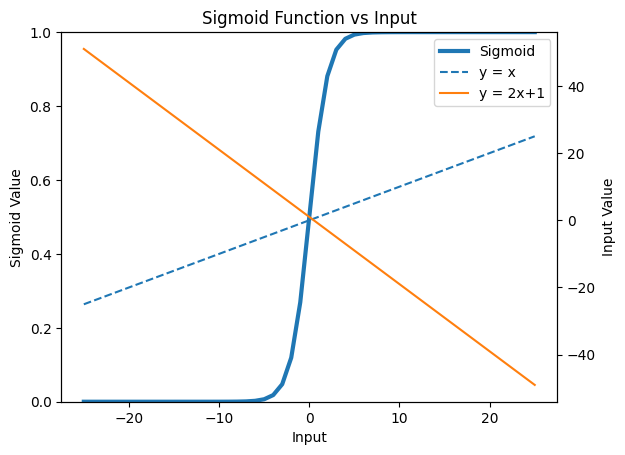

In [5]:
input = np.arange(-25,26)

output = np.exp(input)

print(input)
# print(output)

w = -2
b = 1

f = w*input + b

sigmoid_output = sigmoid(input)

print(sigmoid_output)


fig, ax1 = plt.subplots()
ax1.plot(input, sigmoid_output, label="Sigmoid", linewidth=3)
ax1.set_ylabel("Sigmoid Value")
ax1.set_ylim(0, 1)

ax2 = ax1.twinx()
ax2.plot(input, input, linestyle="--", label="y = x")

ax2.plot(input, f, linestyle="-", label="y = 2x+1")
ax2.set_ylabel("Input Value")

ax1.set_xlabel("Input")
plt.title("Sigmoid Function vs Input")

# combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)

plt.show()

Create a mean squared loss function and plot loss graph



In [6]:
def mean_squared_loss(x_train, y_train, w, b):
  m = x_train.shape[0]
  f = np.dot(x_train, w) + b
  # f = w * x_train + b
  # f = w * x_train + b
  sigmoid_values = sigmoid(f);
  return (1/2 * m) * np.sum(np.square(y_train - sigmoid_values))






Define logistic loss function

In [7]:
def logistic_loss(x_train, y_train,w,b):
  m = x_train.shape[0]
  f = np.dot(x_train, w) + b
  # f = w*x + b (for 1-D arrays)
  sigmoid_values = sigmoid(f)
  # sigmoid_values = np.clip(sigmoid_values, 1e-15, 1 - 1e-15)
  return (-1/m) * np.sum(((y_train *  np.log(sigmoid_values)) + ((1-y_train) * np.log(1-sigmoid_values))))

In [17]:
# x_train = np.array([1,2,3,4,5])

# w = np.array([1])
# b = 1
# y_train = np.array([0,0,0,1,1])

# print(mean_squared_loss(x_train, y_train,w,b))

# print(logistic_loss(x_train, y_train,w,b))


X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])

print(X_train.shape)
# print(y_train.shape)
w_tmp = np.array([1,1])
b_tmp = -3

print(mean_squared_loss(X_train, y_train, w_tmp,b_tmp))
print(logistic_loss(X_train, y_train, w_tmp, b_tmp))

(6, 2)
1.7231755971214646
0.3668667864055174


Define Compute Gradient Method

In [39]:
def compute_gradient_logistic(x_train, y_train, w, b):
  m,n = x_train.shape
  f = np.dot(x_train, w) + b
  y_cap = sigmoid(f)
  dj_dw = np.zeros(n)
  dj_db = 0.

  for i in range(m):
    err = (y_cap[i]- y_train[i])
    for j in range(n):
      dj_dw[j] += err * x_train[i,j]
    dj_db += err


  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_dw, dj_db



In [45]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw, dj_db = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_dw: {dj_dw}" )
print(f"dj_dwb: {dj_db.tolist()}" )

dj_dw: [0.49833339 0.49883943]
dj_dwb: 0.49861806546328574


Define gradient descent function

In [46]:
def gradient_descent(x_train, y_train, w_init, b_init,alpha, loss_function, iterations):
  w = copy.deepcopy(w_init)
  J_history = []

  for i in range(iterations):
    dw,db = compute_gradient_logistic(x_train, y_train, w,b_init)
    w -= (alpha * dw)
    b_init -= (alpha*db)
    J_history.append(loss_function(x_train, y_train, w, b_init))
    if i% math.ceil(iterations / 10) == 0:
      print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

  return w, b_init, J_history


Perform gradient descent on a test dataset

Iteration    0: Cost 0.6846104685605738   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.0846006417693008   
Iteration 3000: Cost 0.05705327279402528   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.034338477298845566   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569289   
Iteration 9000: Cost 0.019030137124109094   
w,b found by gradient descent: [5.28123029 5.07815608], -14.222409982019839


Text(0, 0.5, 'Cost')

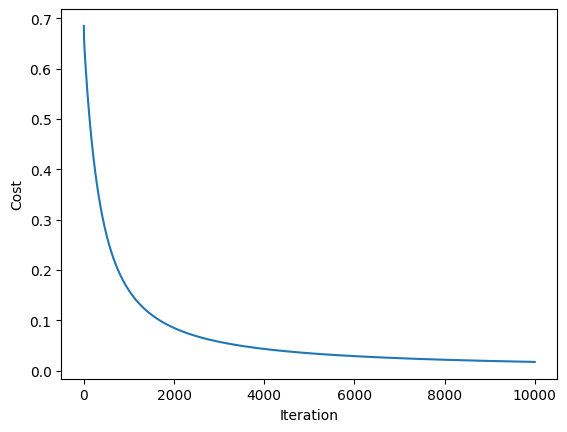

In [57]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])

w_tmp = np.zeros(X_train.shape[1])
b_tmp = 0
alpha = 0.1
iterations = 10000

w,b,J_history = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, logistic_loss, iterations)

print(f"w,b found by gradient descent: {w}, {b}")

plt.plot(J_history)

plt.xlabel("Iteration")
plt.ylabel("Cost")


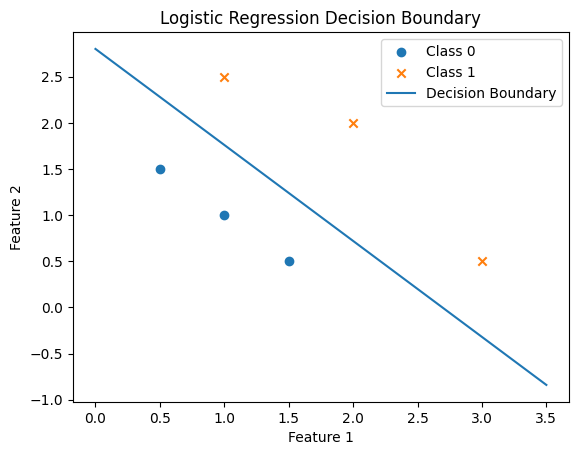

In [58]:

plt.figure()

# Plot data points
plt.scatter(X_train[y_train == 0][:, 0],
            X_train[y_train == 0][:, 1],
            marker='o',
            label='Class 0')

plt.scatter(X_train[y_train == 1][:, 0],
            X_train[y_train == 1][:, 1],
            marker='x',
            label='Class 1')

# Decision boundary
x1_vals = np.array([
    X_train[:, 0].min() - 0.5,
    X_train[:, 0].max() + 0.5
])

# creating an equation where w1 x1+ w2 x2 - b = 0 for decision boundary

x2_vals = -(w[0] * x1_vals + b) / w[1]

plt.plot(x1_vals, x2_vals, label='Decision Boundary')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()


Using scikit-learn for Logitstic Regression

In [62]:
from sklearn.linear_model import LogisticRegression


X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])


lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print(y_pred)

lr.score(X_train, y_train)



[0 0 0 1 1 1]


1.0